# This code to check u-net model


In [4]:
import tensorflow as tf
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dtest0 = xr.open_dataset('data/tb_test.nc')

# normalize data
dtest = ( dtest0 - dtest0.mean() ) / dtest0.std()

In [6]:
X_test = np.expand_dims(dtest.lo.values,3)
y_test = dtest.hi.values

In [13]:
# load model and run
xmodel = tf.keras.models.load_model('tb_small') 
xmodel.summary()

Model: "t2m_downscaling_unet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 24, 32, 1)]  0           []                               
                                                                                                  
 conv2d_60 (Conv2D)             (None, 24, 32, 56)   560         ['input_7[0][0]']                
                                                                                                  
 batch_normalization_60 (BatchN  (None, 24, 32, 56)  224         ['conv2d_60[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_60 (Activation)     (None, 24, 32, 56)   0           ['batch_normal

## Look at procesess 
to see each layers

what they do



In [14]:
import json
summary = str(xmodel.to_json())
a = json.loads(summary)
al = a['config']['layers']

xlayers = xmodel.layers
n_xlayers = len(xlayers)

for i in range( n_xlayers )[:]:    
    print(i, 
          al[i]['class_name'], 
          al[i]['config']['name'], 
          al[i]['inbound_nodes']
          )

0 InputLayer input_7 []
1 Conv2D conv2d_60 [[['input_7', 0, 0, {}]]]
2 BatchNormalization batch_normalization_60 [[['conv2d_60', 0, 0, {}]]]
3 Activation activation_60 [[['batch_normalization_60', 0, 0, {}]]]
4 Conv2D conv2d_61 [[['activation_60', 0, 0, {}]]]
5 BatchNormalization batch_normalization_61 [[['conv2d_61', 0, 0, {}]]]
6 Activation activation_61 [[['batch_normalization_61', 0, 0, {}]]]
7 MaxPooling2D max_pooling2d_18 [[['activation_61', 0, 0, {}]]]
8 Conv2D conv2d_62 [[['max_pooling2d_18', 0, 0, {}]]]
9 BatchNormalization batch_normalization_62 [[['conv2d_62', 0, 0, {}]]]
10 Activation activation_62 [[['batch_normalization_62', 0, 0, {}]]]
11 MaxPooling2D max_pooling2d_19 [[['activation_62', 0, 0, {}]]]
12 Conv2D conv2d_63 [[['max_pooling2d_19', 0, 0, {}]]]
13 BatchNormalization batch_normalization_63 [[['conv2d_63', 0, 0, {}]]]
14 Activation activation_63 [[['batch_normalization_63', 0, 0, {}]]]
15 MaxPooling2D max_pooling2d_20 [[['activation_63', 0, 0, {}]]]
16 Conv2D conv

### Low how they behave?

In [20]:
xlayers = xmodel.layers

l0 = X_test  # 0 layer = input layer
layx = {0:l0}  # python dictionary type

for i in range(n_xlayers)[1:]:
    
    layer = xmodel.layers[i]
    if i == 20:  # this is concatenate layer 
        l0 = layer( (layx[i-1], layx[14] ) )

    elif i == 28: # this is concatenate layer 
        l0 = layer( (layx[i-1], layx[10] ) )

    elif i == 36: # this is concatenate layer 
        l0 = layer( (layx[i-1], layx[6] ) )        
        
    else: l0 = layer(l0)
    
    layx[i] = l0

In [40]:
X_test.shape


(44, 24, 32, 1)

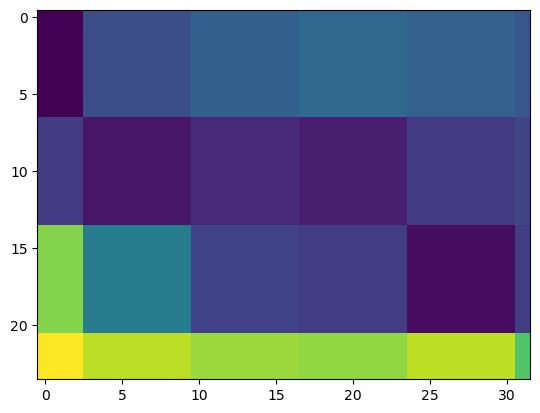

In [45]:
plt.imshow(X_test[0])

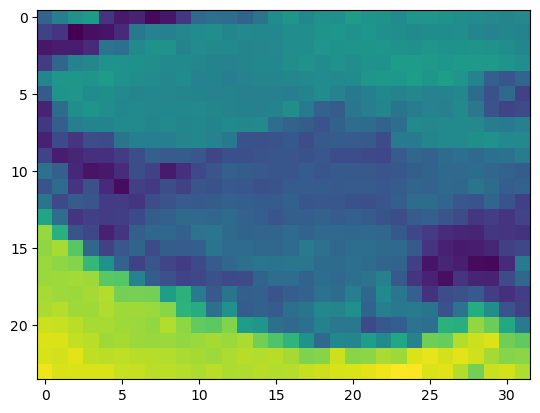

In [47]:
layx[43][0]

plt.imshow( layx[43][0] )

0


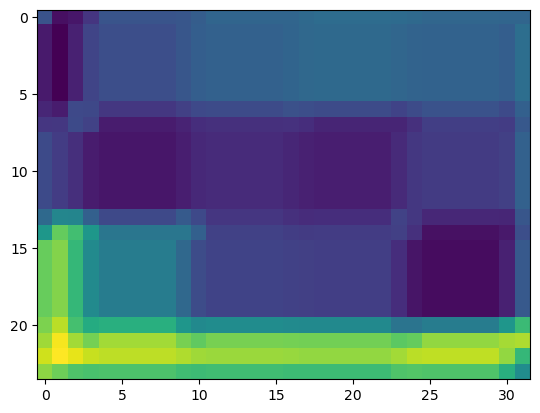

1


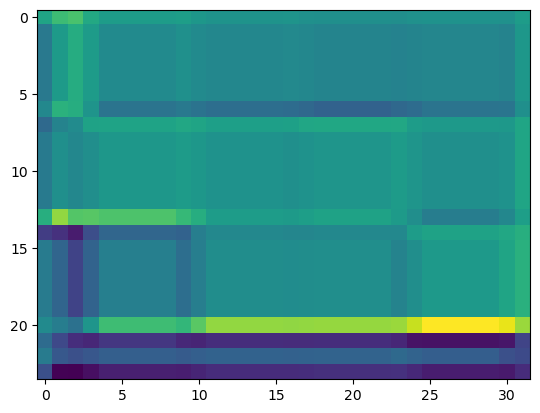

2


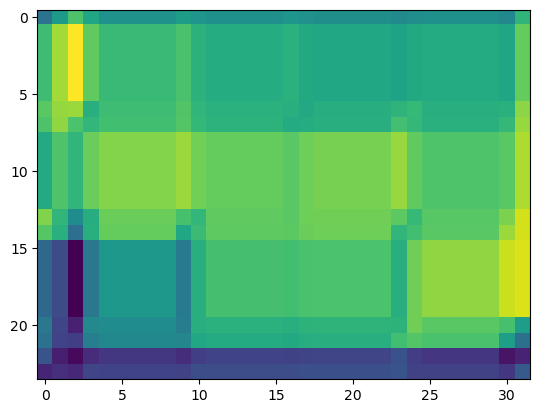

3


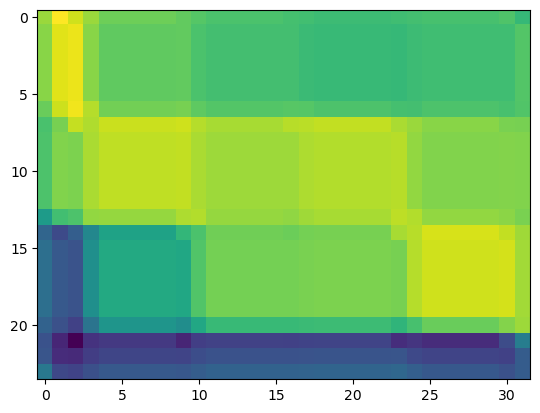

4


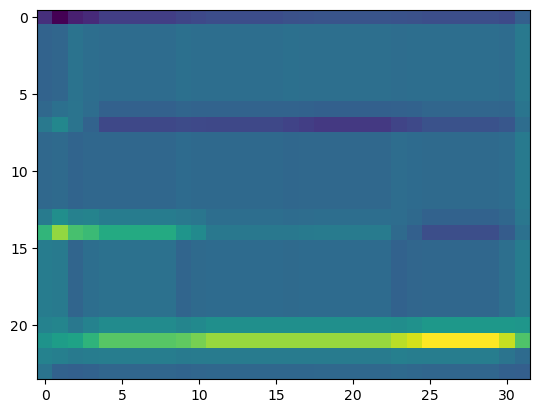

5


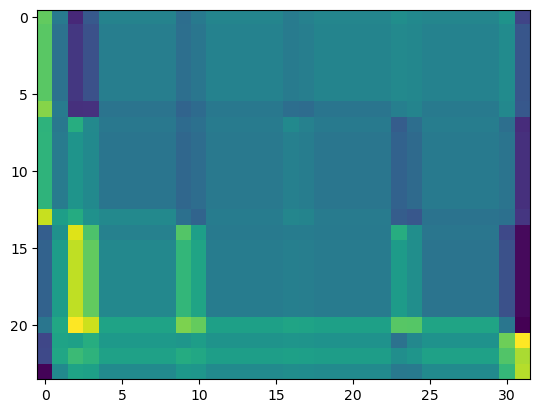

6


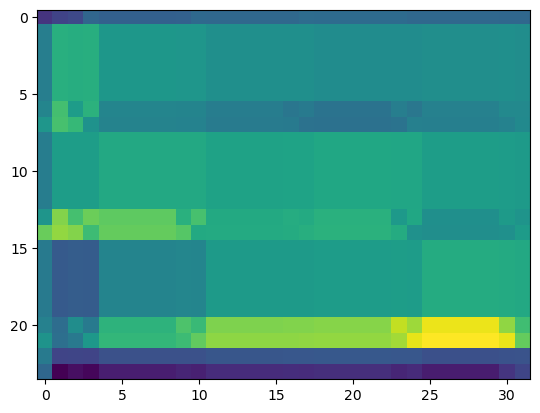

7


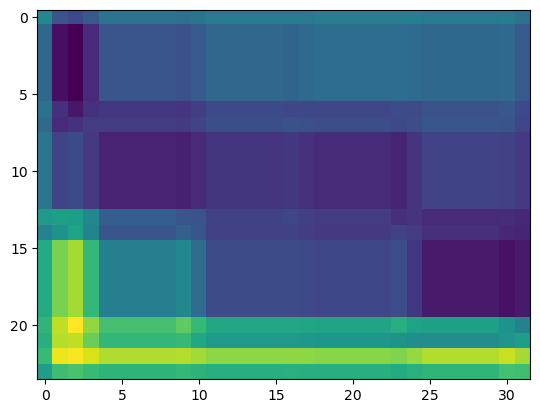

8


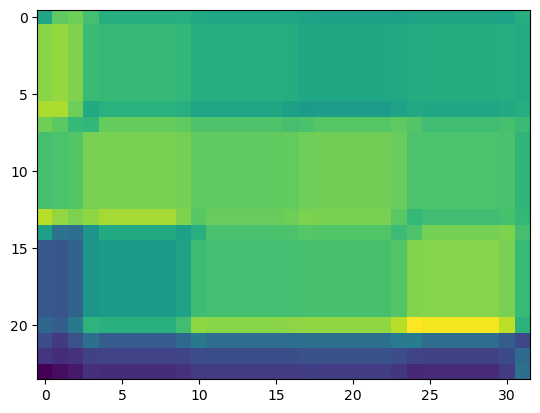

9


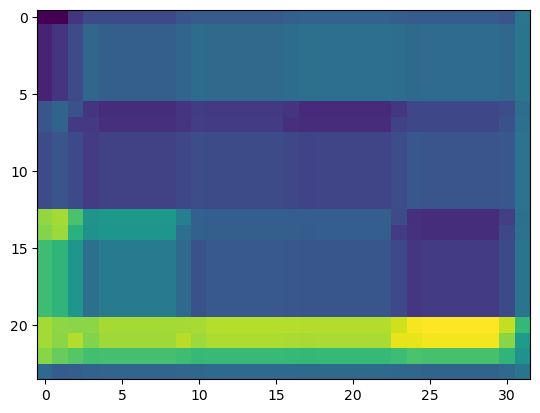

10


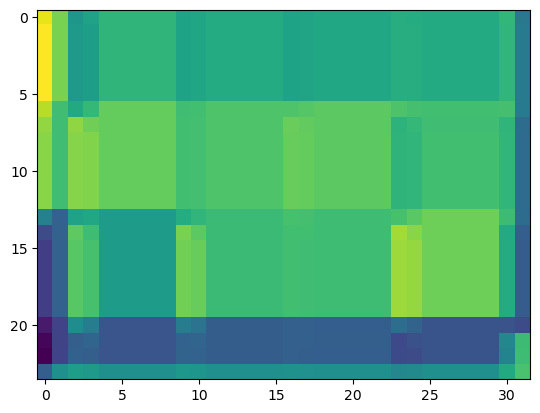

11


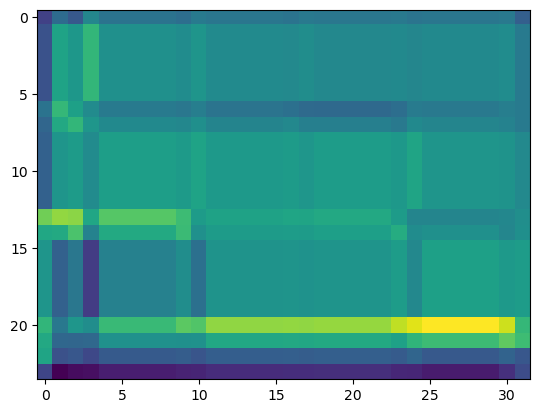

12


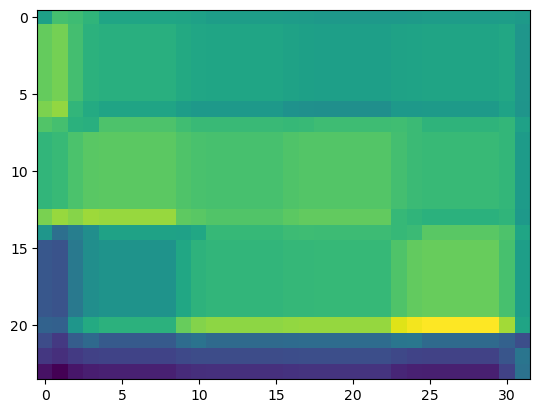

13


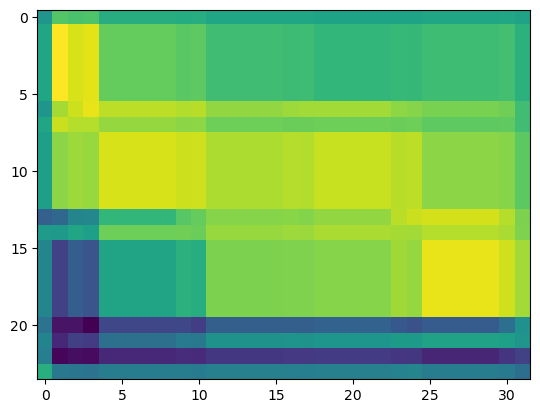

14


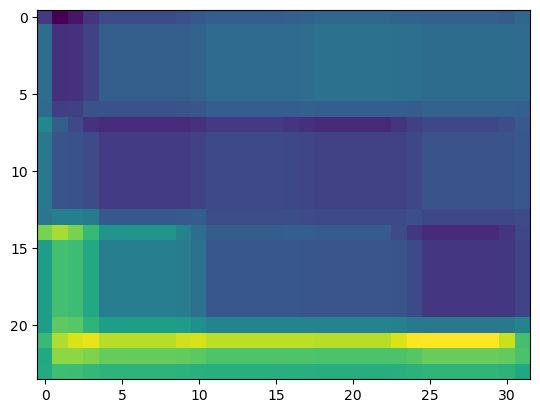

15


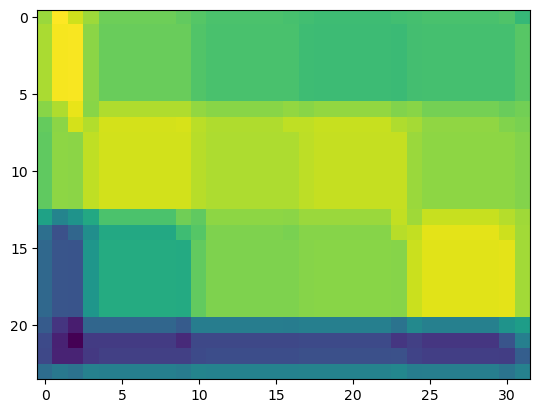

16


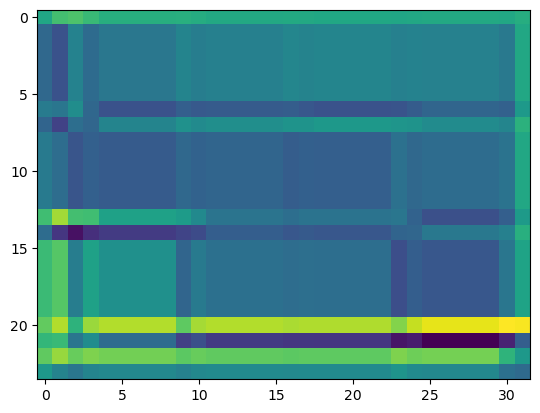

17


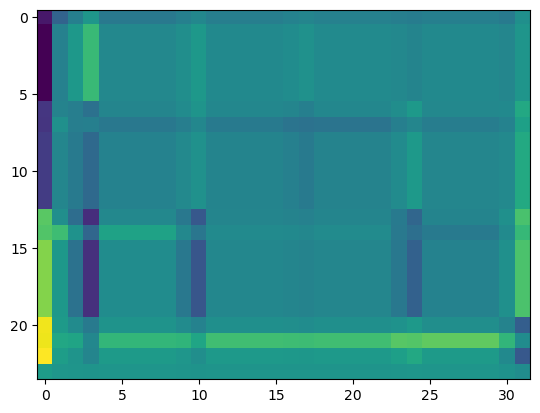

18


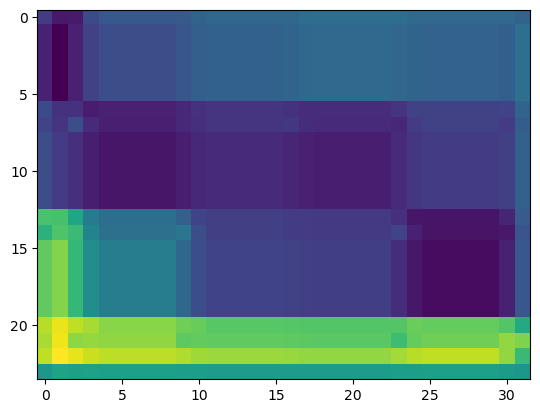

19


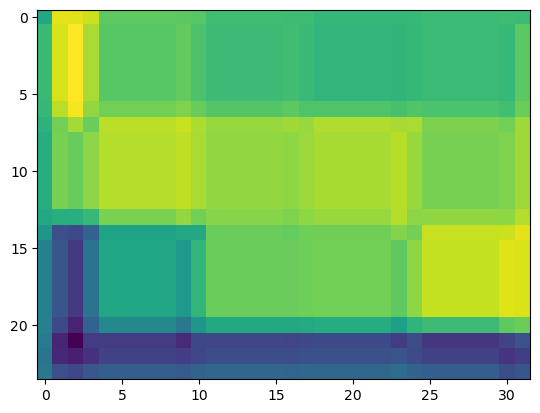

20


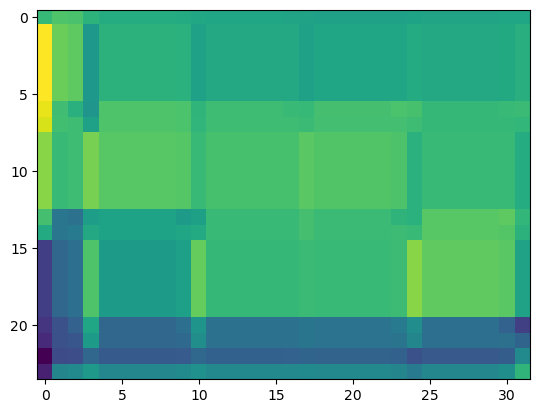

21


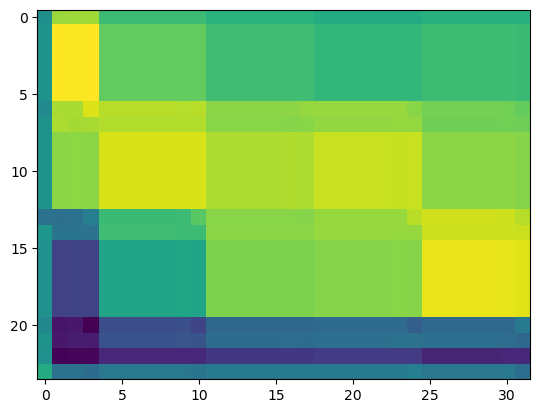

22


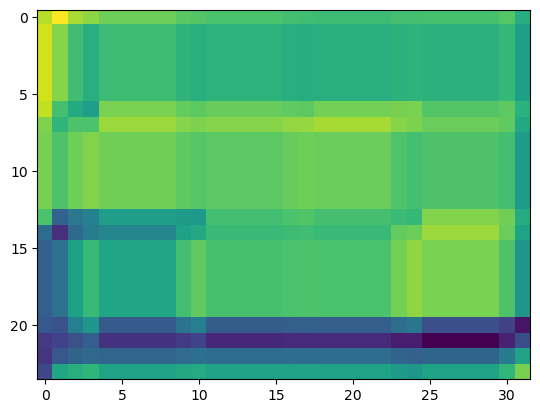

23


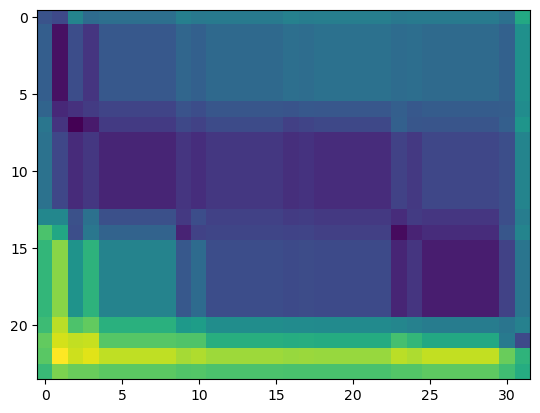

24


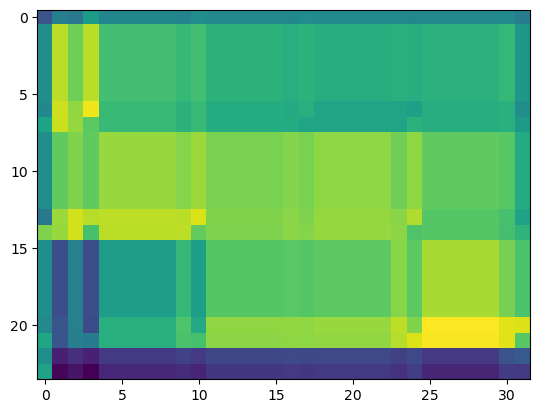

25


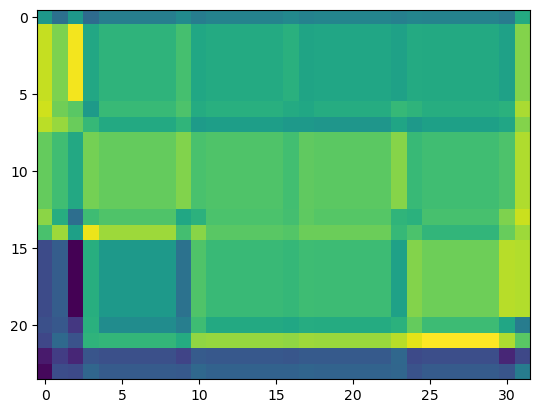

26


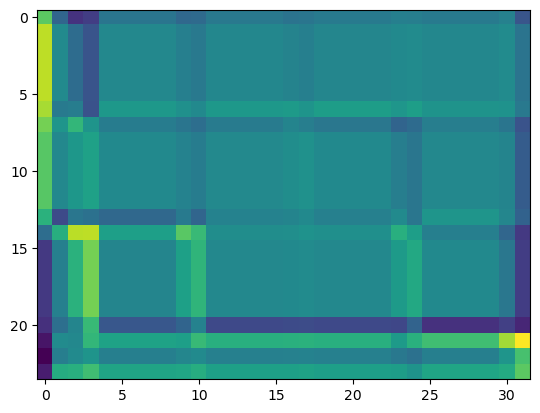

27


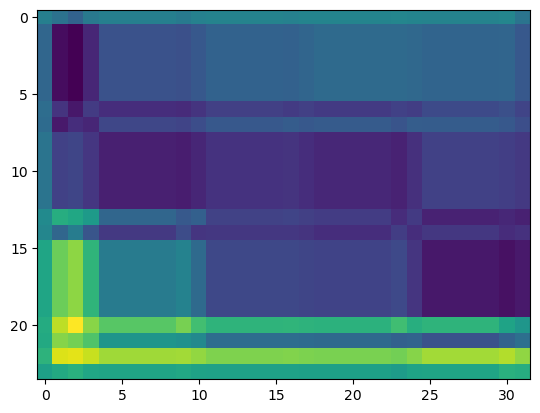

28


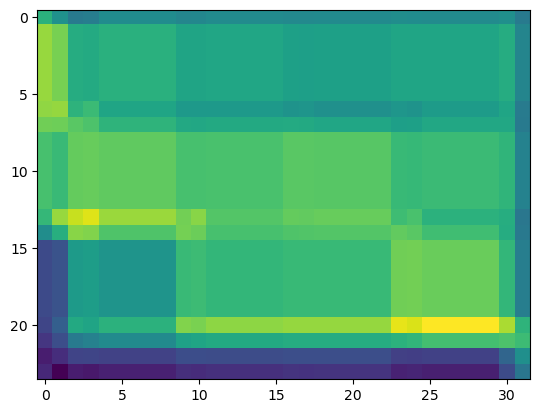

29


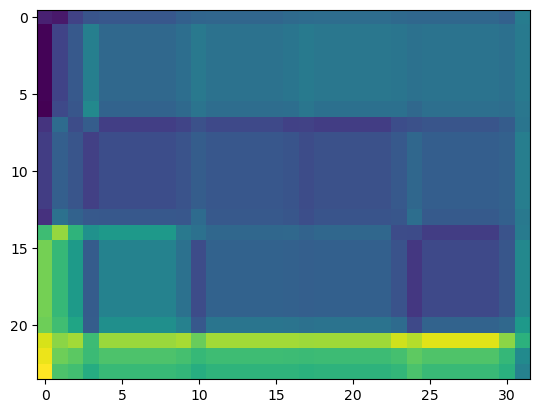

30


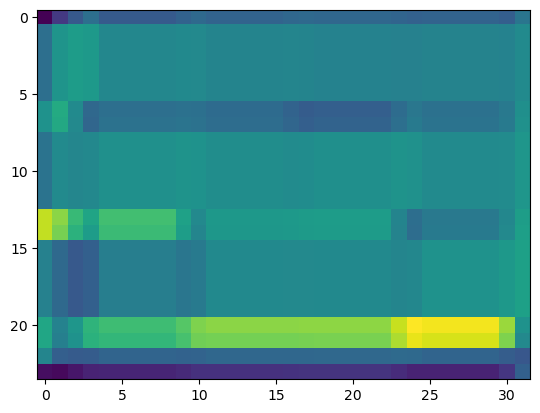

31


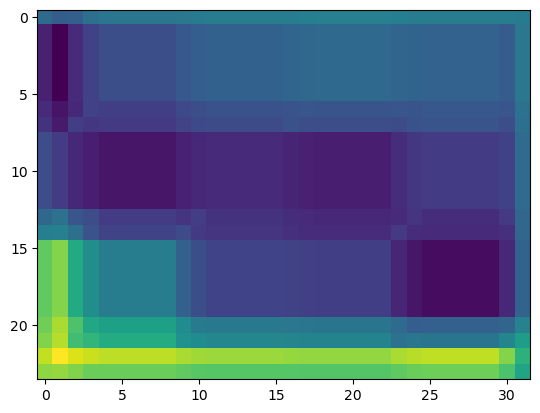

32


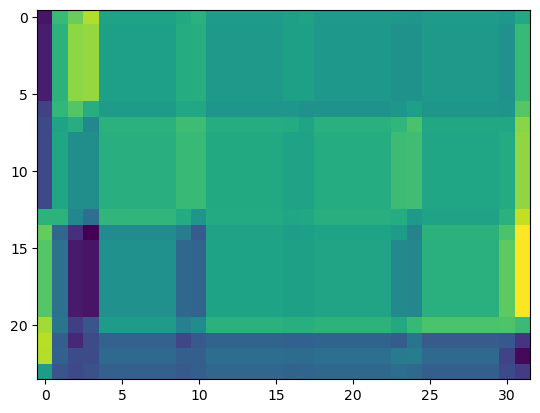

33


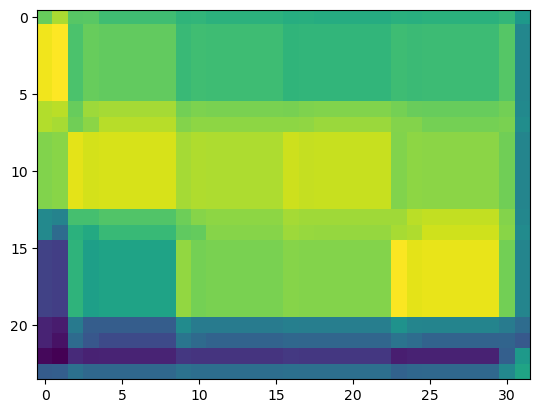

34


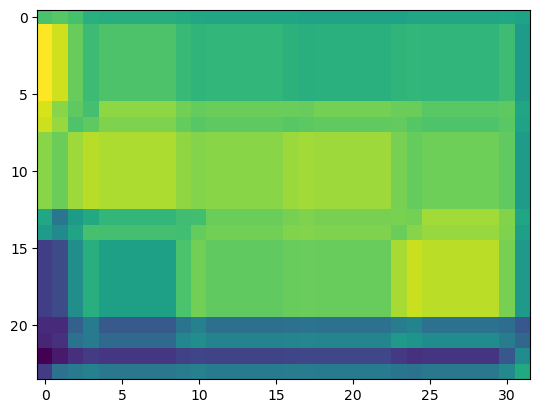

35


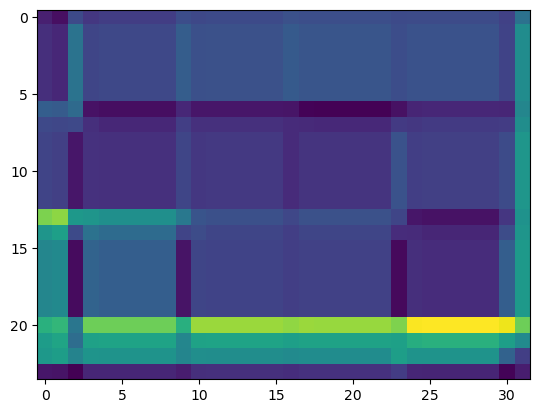

36


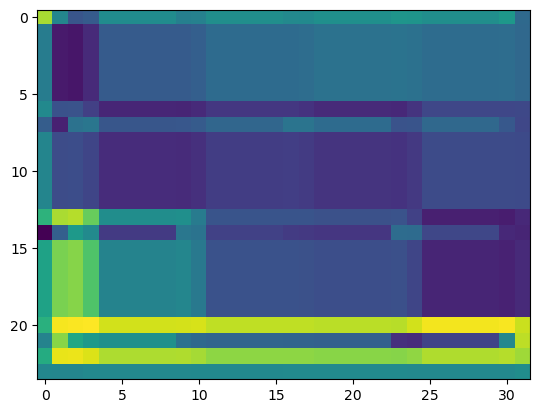

37


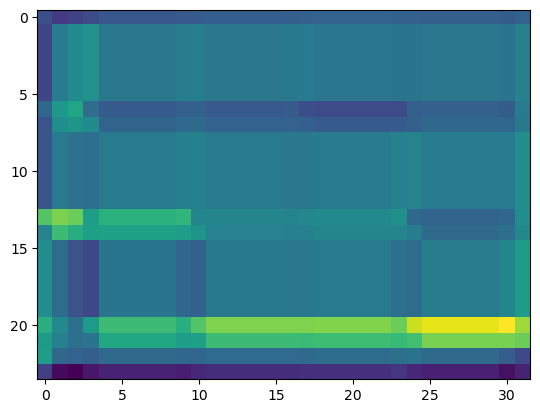

38


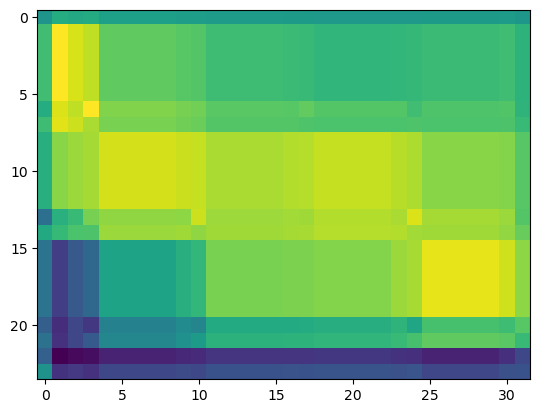

39


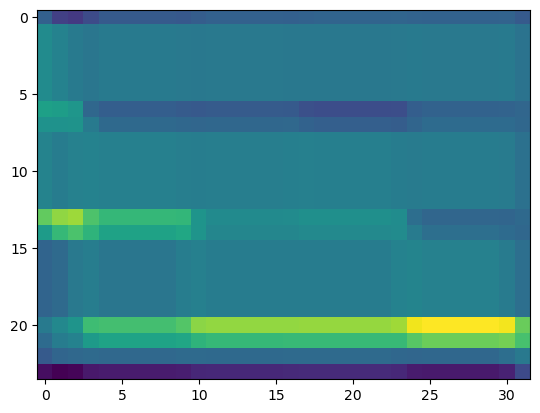

40


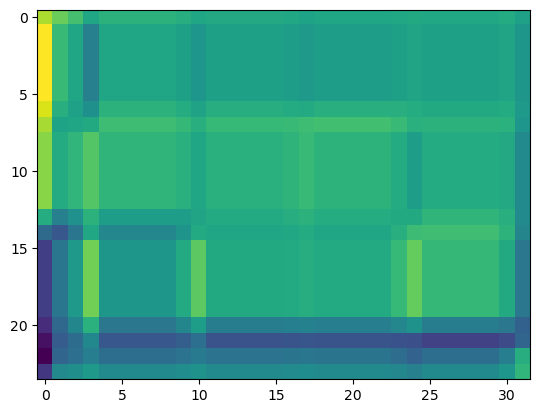

41


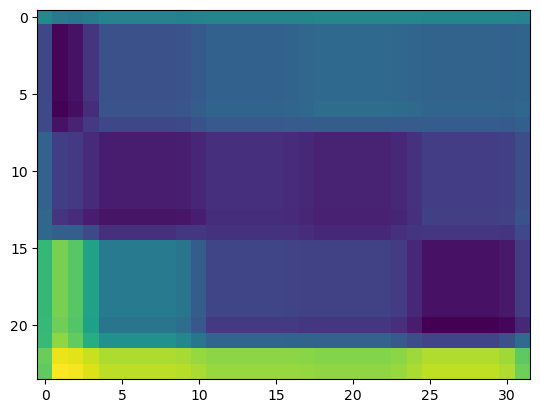

42


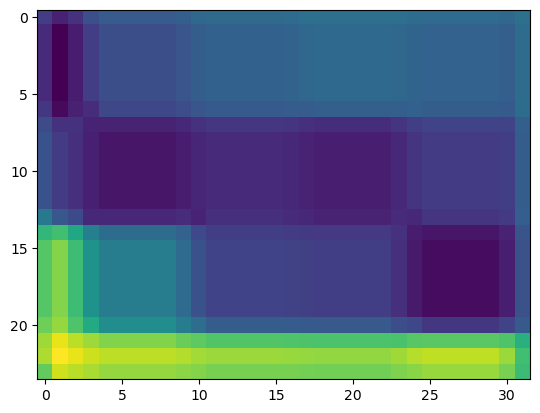

43


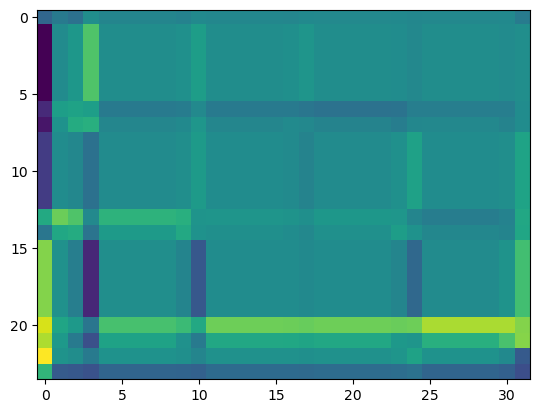

44


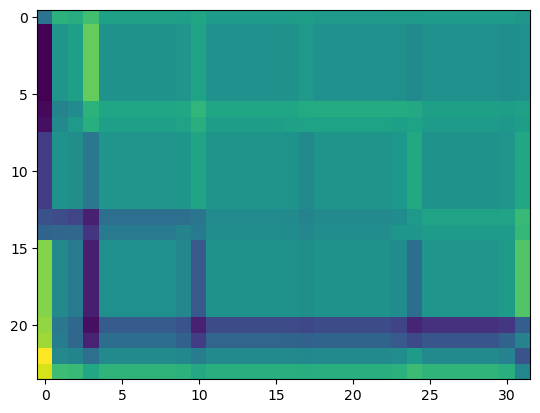

45


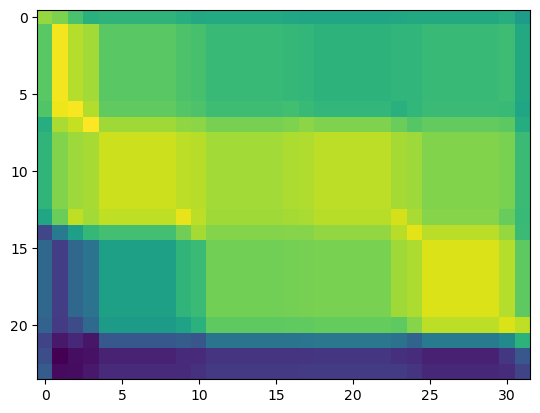

46


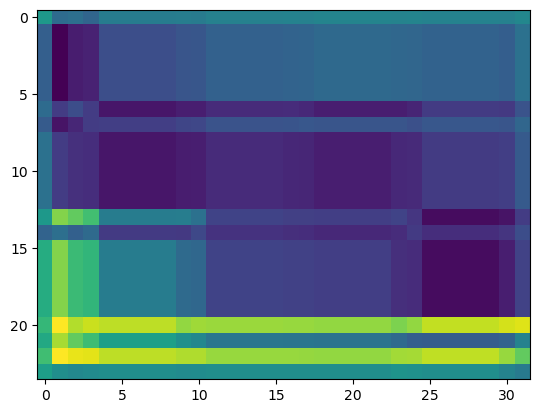

47


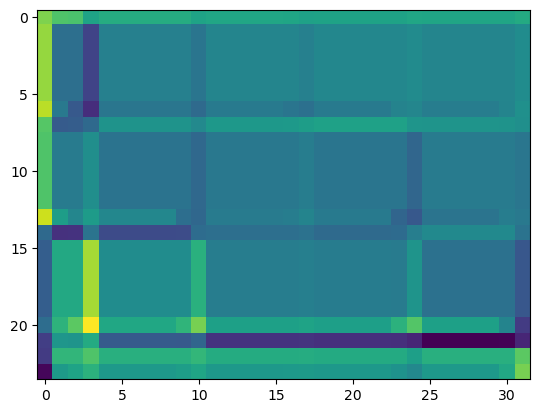

48


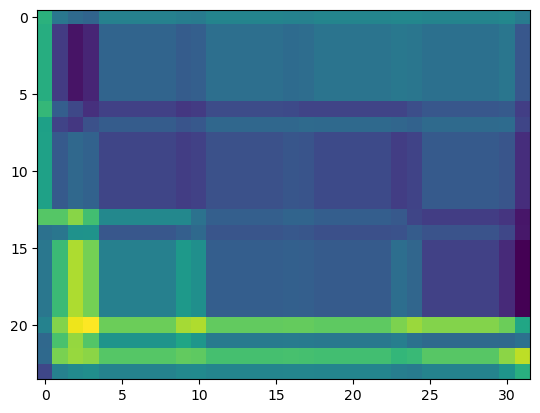

49


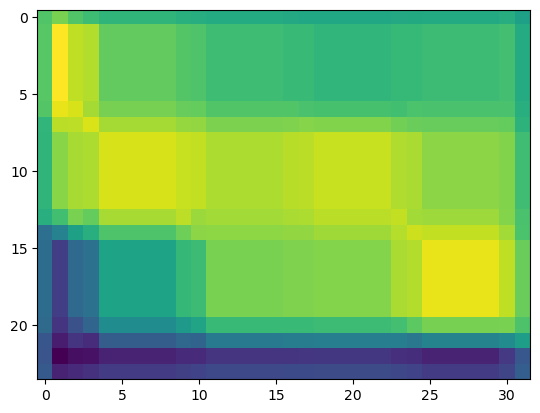

50


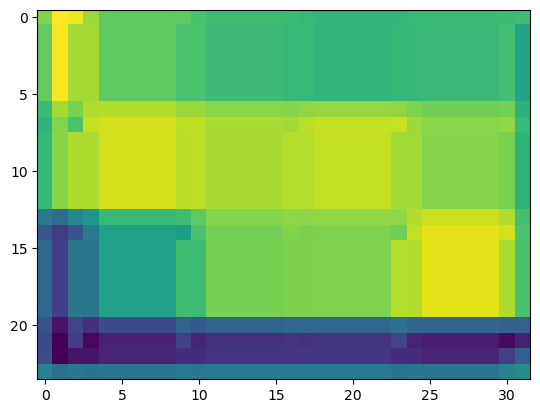

51


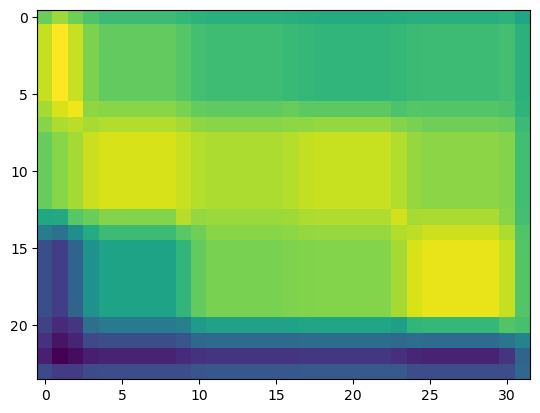

52


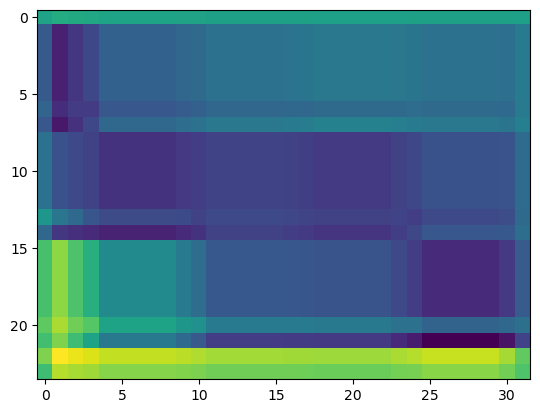

53


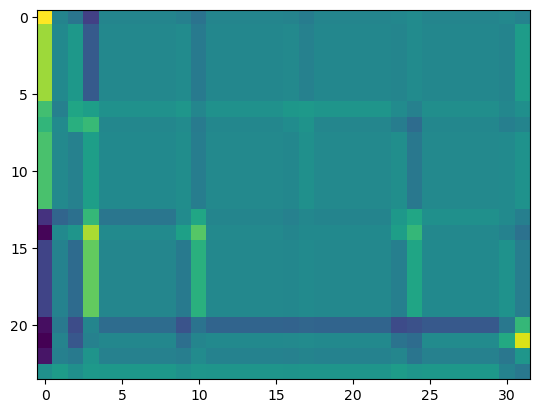

54


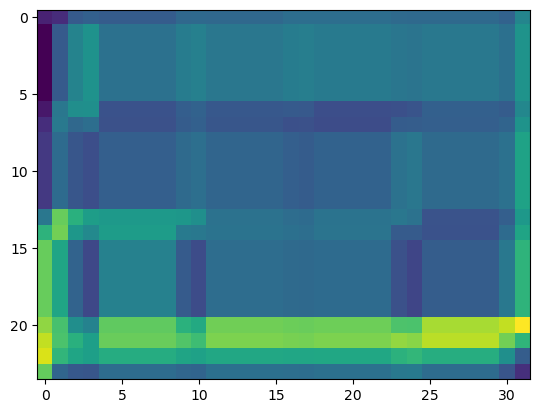

55


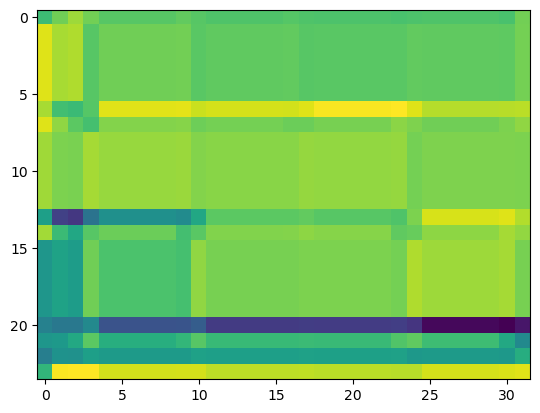

In [48]:


for ilay in list(layx.keys())[1:2]:
    l0 = layx[ilay]
    #print(ilay, len(layer))
    #print(l0.shape) # the first image from X_test

    lshape = l0[0].shape
    for k in range(lshape[-1])[:]:
        print(k)
        b = l0[0,:,:,k]
        plt.imshow(b)
        plt.show()


In [19]:
print(layx.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43])


In [17]:

xlayers = xmodel.layers

l0 = X_test  # 0 layer = input layer
layx = {0:l0}  # python dictionary type

for i in range(n_xlayers)[1:]:
    
    layer = xmodel.layers[i]
    if i == 20:  # this is concatenate layer 
        l0 = layer( (layx[i-1], layx[14] ) )

    elif i == 28: # this is concatenate layer 
        l0 = layer( (layx[i-1], layx[10] ) )

    elif i == 36: # this is concatenate layer 
        l0 = layer( (layx[i-1], layx[6] ) )        
        
    else: l0 = layer(l0)
    
    lshape = l0[0].shape
    for k in range(lshape[-1])[:0]:
        print(k)
        b = l0[0,:,:,k]
        plt.imshow(b)
        plt.show()
        
    layx[i] = l0
    
    print(i, al[i]['class_name'])
    if al[i]['class_name'] == 'Conv2D':
        print(i, layer.name, ': ', len(layer.weights) )
        w = layer.weights
        print(w[0].shape)
        #plt.imshow(w[0][:,:,0,0])
        #plt.show()
    
    
    
    #for w in layer.get_weights():
    #    print(w)

1 Conv2D
1 conv2d_60 :  2
(3, 3, 1, 56)
2 BatchNormalization
3 Activation
4 Conv2D
4 conv2d_61 :  2
(3, 3, 56, 56)
5 BatchNormalization
6 Activation
7 MaxPooling2D
8 Conv2D
8 conv2d_62 :  2
(3, 3, 56, 112)
9 BatchNormalization
10 Activation
11 MaxPooling2D
12 Conv2D
12 conv2d_63 :  2
(3, 3, 112, 224)
13 BatchNormalization
14 Activation
15 MaxPooling2D
16 Conv2D
16 conv2d_64 :  2
(3, 3, 224, 448)
17 BatchNormalization
18 Activation
19 Conv2DTranspose
20 Concatenate
21 Conv2D
21 conv2d_65 :  2
(3, 3, 448, 224)
22 BatchNormalization
23 Activation
24 Conv2D
24 conv2d_66 :  2
(3, 3, 224, 224)
25 BatchNormalization
26 Activation
27 Conv2DTranspose
28 Concatenate
29 Conv2D
29 conv2d_67 :  2
(3, 3, 224, 112)
30 BatchNormalization
31 Activation
32 Conv2D
32 conv2d_68 :  2
(3, 3, 112, 112)
33 BatchNormalization
34 Activation
35 Conv2DTranspose
36 Concatenate
37 Conv2D
37 conv2d_69 :  2
(3, 3, 112, 56)
38 BatchNormalization
39 Activation
40 Conv2D
40 conv2d_70 :  2
(3, 3, 56, 56)
41 BatchNormaliz